In [152]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from cnn import CNN
from sklearn.model_selection import StratifiedKFold

In [2]:
!ls

kmnist-test-imgs.npz   kmnist-train-labels.npz
kmnist-train-imgs.npz  kmnist.ipynb


In [37]:
imgs=np.load("./kmnist-train-imgs.npz")["arr_0"]
labels = np.load("./kmnist-train-labels.npz")["arr_0"]

In [38]:
imgs.shape

(60000, 28, 28)

In [39]:
img = imgs[0]
img.shape

(28, 28)

In [40]:
%matplotlib inline

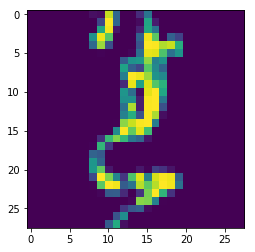

In [41]:
plt.imshow(img)

In [15]:
labels[0]

8

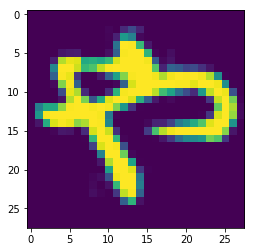

In [19]:
plt.imshow(imgs[1])

In [20]:
labels[1]

7

In [22]:
labels.shape

(60000,)

In [42]:
train_data = imgs[:100]

In [43]:
train_label=labels[:100]


In [44]:
train_data.shape

(100, 28, 28)

In [45]:
train_label.shape

(100,)

In [47]:
import tensorflow as tf
in_ph=tf.placeholder(tf.float32,shape=[None,28,28,1])

In [48]:
target_ph=tf.placeholder(tf.float32,shape=[None,10])

In [49]:
labels_onehot=np.zeros([100,10])

In [50]:
for i,l in enumerate(train_label):
    labels_onehot[i,l]=1

In [52]:
labels_onehot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [53]:
model=CNN(3,3,ch_list=[1,16,16,8])

In [54]:
output=model(in_ph)

In [55]:
output

<tf.Tensor 'Softmax_1:0' shape=(?, 10) dtype=float32>

In [56]:
loss=tf.reduce_mean(-output*tf.log(target_ph+1e-7))

In [57]:
train_op=tf.train.AdamOptimizer().minimize(loss)

In [59]:
saver=tf.train.Saver(tf.global_variables())

In [60]:
sess=tf.InteractiveSession()

/home/wataru/.virtualenvs/python3/lib/python3.5/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [117]:
sess.run(tf.global_variables_initializer())

In [118]:
train_label

array([8, 7, 0, 1, 4, 2, 4, 8, 1, 1, 5, 1, 0, 5, 7, 6, 1, 7, 9, 5, 7, 3,
       7, 5, 6, 6, 2, 7, 6, 0, 9, 6, 1, 5, 9, 5, 8, 0, 0, 8, 8, 6, 7, 7,
       7, 8, 1, 9, 6, 0, 5, 1, 1, 1, 3, 2, 2, 6, 4, 3, 5, 5, 4, 6, 6, 1,
       7, 8, 8, 3, 1, 9, 9, 3, 2, 1, 0, 4, 8, 2, 3, 6, 9, 9, 6, 5, 6, 1,
       0, 7, 2, 2, 8, 0, 1, 8, 6, 6, 3, 5], dtype=uint8)

In [119]:
labels_onehot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [120]:
train_data[:5]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [121]:
max(train_data[0,10,:])

array([1.])

In [73]:
train_data=255*train_data

In [122]:
train_data.shape

(100, 28, 28, 1)

In [69]:
train_data = np.expand_dims(train_data,axis=3)

In [123]:
labels_onehot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [124]:
feed_dict={in_ph: train_data,
          target_ph: labels_onehot}

In [143]:
for e in range(1,50):
    
    result=sess.run([loss,train_op],feed_dict=feed_dict)
    #print(result[0])

In [144]:
model.w_fc1.eval()

array([[ 0.05156864, -0.02418926,  0.03305778, ...,  0.00191432,
        -0.05768918,  0.03514126],
       [ 0.04311907, -0.03477947, -0.03611483, ..., -0.00650151,
        -0.03871722,  0.03338973],
       [ 0.02613699, -0.02968901, -0.02579619, ...,  0.02215345,
        -0.00786019,  0.05652944],
       ...,
       [-0.04203099, -0.04362027, -0.04710925, ..., -0.05813958,
         0.0406571 ,  0.04550347],
       [-0.05332243, -0.03865099, -0.04224664, ..., -0.06053649,
         0.07202509,  0.06324984],
       [-0.05906552, -0.03518696, -0.03417537, ..., -0.0629941 ,
         0.06655134,  0.06246831]], dtype=float32)

In [145]:
pred=sess.run(output,feed_dict=feed_dict)

In [146]:
pred[:5]

array([[1.26467916e-04, 5.61295450e-01, 1.87239984e-08, 1.50999867e-07,
        1.59351341e-08, 1.74373235e-05, 4.25199658e-01, 7.30114337e-03,
        6.05939841e-03, 2.28714484e-07],
       [7.88832549e-03, 1.83204096e-03, 8.41096127e-14, 3.82869647e-09,
        1.17976402e-13, 1.30696902e-02, 9.69455577e-04, 9.75557387e-01,
        6.83126098e-04, 9.21905607e-12],
       [8.08590472e-01, 1.25505947e-04, 2.51768417e-17, 8.43443371e-12,
        8.93373193e-17, 7.08503351e-02, 2.13358561e-07, 1.36189818e-04,
        1.20297246e-01, 2.22203830e-14],
       [3.11926298e-04, 5.85980415e-01, 1.80521145e-08, 5.28758619e-08,
        1.76238828e-08, 7.37827941e-06, 3.97635102e-01, 4.23382502e-03,
        1.18309185e-02, 3.28302917e-07],
       [4.99947695e-04, 4.42510962e-01, 9.63883061e-17, 4.65271441e-12,
        1.12890712e-16, 6.34397948e-05, 5.14593124e-01, 3.39545459e-02,
        8.37798044e-03, 8.78559031e-12]], dtype=float32)

In [147]:
pred

array([[1.26467916e-04, 5.61295450e-01, 1.87239984e-08, 1.50999867e-07,
        1.59351341e-08, 1.74373235e-05, 4.25199658e-01, 7.30114337e-03,
        6.05939841e-03, 2.28714484e-07],
       [7.88832549e-03, 1.83204096e-03, 8.41096127e-14, 3.82869647e-09,
        1.17976402e-13, 1.30696902e-02, 9.69455577e-04, 9.75557387e-01,
        6.83126098e-04, 9.21905607e-12],
       [8.08590472e-01, 1.25505947e-04, 2.51768417e-17, 8.43443371e-12,
        8.93373193e-17, 7.08503351e-02, 2.13358561e-07, 1.36189818e-04,
        1.20297246e-01, 2.22203830e-14],
       [3.11926298e-04, 5.85980415e-01, 1.80521145e-08, 5.28758619e-08,
        1.76238828e-08, 7.37827941e-06, 3.97635102e-01, 4.23382502e-03,
        1.18309185e-02, 3.28302917e-07],
       [4.99947695e-04, 4.42510962e-01, 9.63883061e-17, 4.65271441e-12,
        1.12890712e-16, 6.34397948e-05, 5.14593124e-01, 3.39545459e-02,
        8.37798044e-03, 8.78559031e-12],
       [9.95376467e-06, 1.71101898e-01, 4.51982306e-11, 2.80643704e-08,
   

In [148]:
pred_label=[np.argmax(pred[i]) for i in range(100)]

In [149]:
pred_label[:10]

[1, 7, 0, 1, 6, 6, 1, 1, 1, 1]

In [150]:
train_label[:10]

array([8, 7, 0, 1, 4, 2, 4, 8, 1, 1], dtype=uint8)

In [151]:
sum(train_label==pred_label) / 100

0.51

In [153]:
x_train=imgs
x_train.shape

(60000, 28, 28)

In [155]:
y_train=labels
y_train.shape

(60000,)

In [157]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [166]:
for train, test in kfold.split(x_train,y_train):
    print(train.shape)
    

(48000,)
(48000,)
(48000,)
(48000,)
(48000,)


In [168]:
import random

In [169]:
random.shuffle(range(100))

TypeError: 'range' object does not support item assignment

In [173]:
d=list(range(100))

In [174]:
random.shuffle(d)

In [175]:
d

[19,
 31,
 20,
 44,
 60,
 84,
 39,
 43,
 95,
 12,
 13,
 14,
 1,
 82,
 0,
 5,
 53,
 59,
 77,
 56,
 22,
 96,
 68,
 3,
 86,
 41,
 73,
 57,
 4,
 63,
 42,
 79,
 24,
 45,
 76,
 29,
 27,
 74,
 70,
 61,
 80,
 48,
 34,
 16,
 9,
 75,
 90,
 67,
 66,
 40,
 49,
 25,
 33,
 52,
 99,
 85,
 62,
 47,
 23,
 37,
 46,
 94,
 10,
 28,
 93,
 78,
 91,
 71,
 26,
 55,
 97,
 21,
 88,
 64,
 58,
 38,
 15,
 98,
 72,
 6,
 51,
 89,
 92,
 18,
 30,
 65,
 36,
 69,
 8,
 2,
 50,
 87,
 54,
 17,
 81,
 7,
 35,
 83,
 11,
 32]